In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.DataFrame({'numeric': [3, 5, 5, 2.6, 3.5, 4.1, 6, 3, 2.1, 2,4]})
df

,numeric
0,3.0
1,5.0
2,5.0
3,2.6
4,3.5
5,4.1
6,6.0
7,3.0
8,2.1
9,2.0


In [3]:
df.describe()

,numeric
count,11.000000
mean,3.663636
std,1.287845
min,2.000000
25%,2.800000
50%,3.500000
75%,4.550000
max,6.000000


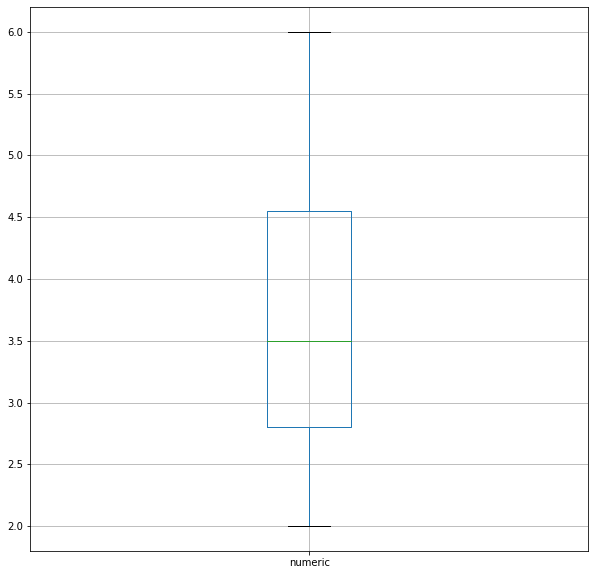

In [4]:
df.boxplot(figsize=(10,10))

In [5]:
df_outlier = pd.DataFrame({'numeric': [3, 5, 5, 2.6, 3.5, 4.1, 6, 3, 2.1, 2,4, 50]})
df_outlier

,numeric
0,3.0
1,5.0
2,5.0
3,2.6
4,3.5
5,4.1
6,6.0
7,3.0
8,2.1
9,2.0


In [6]:
df_outlier.describe()

,numeric
count,12.000000
mean,7.525000
std,13.432398
min,2.000000
25%,2.900000
50%,3.750000
75%,5.000000
max,50.000000


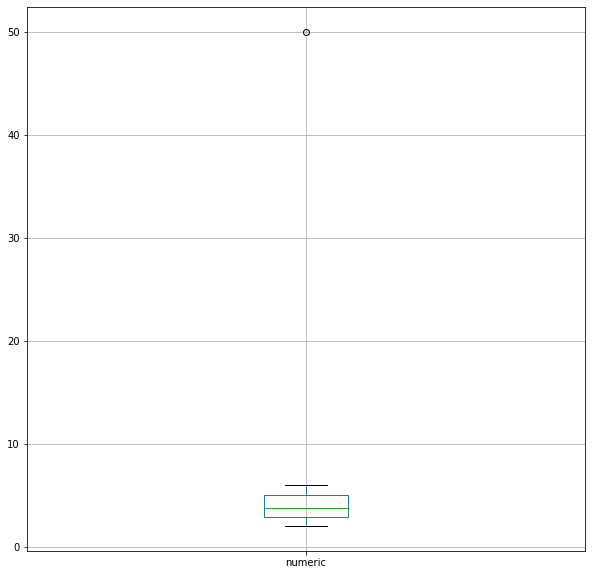

In [7]:
df_outlier.boxplot(figsize=(10,10))

In [8]:
minmax_df = df_outlier.copy()
scaler = StandardScaler()
minmax_df['numeric'] = scaler.fit_transform(minmax_df)

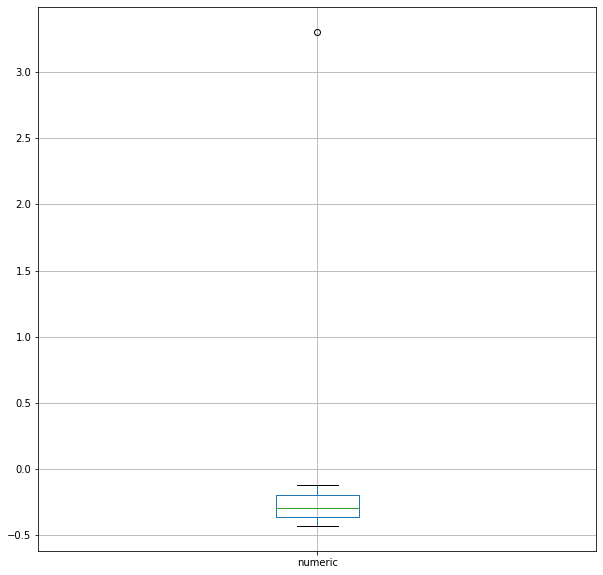

In [9]:
minmax_df.boxplot(figsize=(10,10))

In [10]:
robust_df = df_outlier.copy()
robust_df['numeric'] = scaler.fit_transform(robust_df)

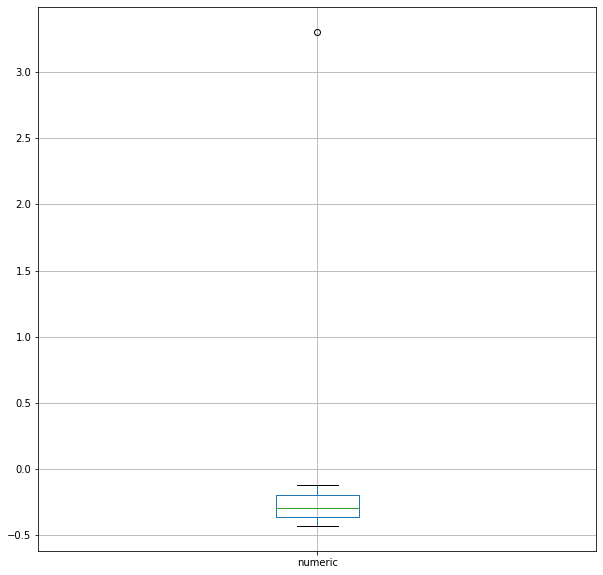

In [11]:
robust_df.boxplot(figsize=(10,10))

In [12]:
minmax_df.describe()

,numeric
count,1.200000e+01
mean,-7.401487e-17
std,1.044466e+00
min,-4.296086e-01
25%,-3.596271e-01
50%,-2.935335e-01
75%,-1.963370e-01
max,3.302738e+00


In [13]:
robust_df.describe()

,numeric
count,1.200000e+01
mean,-7.401487e-17
std,1.044466e+00
min,-4.296086e-01
25%,-3.596271e-01
50%,-2.935335e-01
75%,-1.963370e-01
max,3.302738e+00


In [14]:
missing_df = pd.DataFrame({'numeric': [3, 5, 5, 2.6, 3.5, 4.1, 6, 3, 2.1, 2,4, np.nan, 7.8, 8.9, 10, 7.2, 3.4, 5, 2,9]})
missing_df

,numeric
0,3.0
1,5.0
2,5.0
3,2.6
4,3.5
5,4.1
6,6.0
7,3.0
8,2.1
9,2.0


In [15]:
missing_df.describe()

,numeric
count,19.000000
mean,4.926316
std,2.544895
min,2.000000
25%,3.000000
50%,4.100000
75%,6.600000
max,10.000000


In [16]:
missing_df.isna().sum()

numeric    1
dtype: int64

In [17]:
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [18]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [19]:
k = 2

In [20]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300)

In [21]:
data_and_centers = np.r_[missing_df]

In [22]:
XYcoordinates = manifold.MDS(n_components=2)
print("transformation complete")

transformation complete


In [23]:
XYcoordinates = manifold.TSNE(n_components=2)
print("transformation complete")

transformation complete


In [24]:
missing_df.index

RangeIndex(start=0, stop=20, step=1)

In [25]:
missing_df

,numeric
0,3.0
1,5.0
2,5.0
3,2.6
4,3.5
5,4.1
6,6.0
7,3.0
8,2.1
9,2.0


In [26]:
missing_df.median()

numeric    4.1
dtype: float64

In this way we can impute data with median values of the type of cluster it belongs to. This will eliminate the bias to the dataset